## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.2
Usando seaborn 0.9.0
Usando scipy 1.2.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('movies.csv')
columns = ['filmeId', 'titulo', 'generos']
filmes.columns = columns
filmes.set_index('filmeId', drop=True, inplace=True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
columns = ['usuarioId','filmeId','nota','momento']
notas = pd.read_csv('ratings.csv')
notas.columns = columns

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
media_de_votos_por_filme = notas.groupby("filmeId").mean().nota
filmes['nota_media'] = media_de_votos_por_filme

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
notas_por_filme = notas.groupby('filmeId').count().nota

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas_por_filme
filmes.query('total_de_votos >= 50', inplace=True)

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

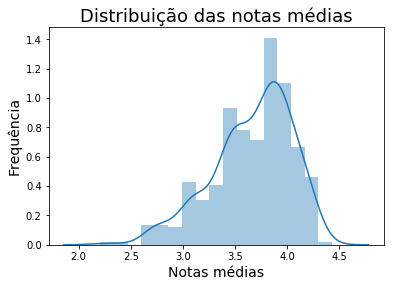

In [14]:
# solução histograma
import matplotlib.pyplot as plt
plt.figure()
sns.distplot(filmes.nota_media)
plt.title("Distribuição das notas médias", fontsize=18)
plt.xlabel("Notas médias", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.show()

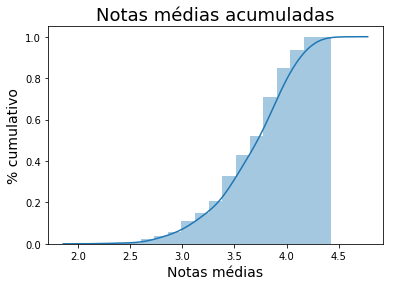

In [15]:
# solução cumulativa
plt.figure()
sns.distplot(filmes.nota_media, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})
plt.title("Notas médias acumuladas", fontsize=18)
plt.xlabel("Notas médias", fontsize=14)
plt.ylabel("% cumulativo", fontsize=14)
plt.show()

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

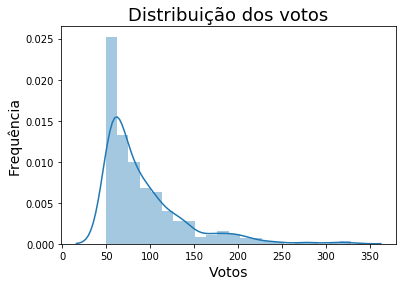

In [16]:
# solução histograma
plt.figure()
sns.distplot(filmes.total_de_votos)
plt.title("Distribuição dos votos", fontsize=18)
plt.xlabel("Votos", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.show()

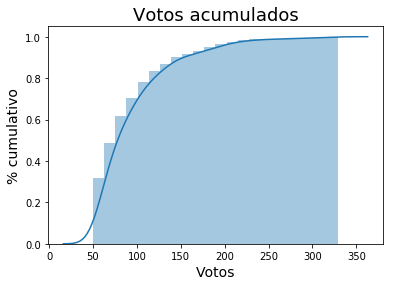

In [17]:
# solução cumulativa
plt.figure()
sns.distplot(filmes.total_de_votos, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})
plt.title("Votos acumulados", fontsize=18)
plt.xlabel("Votos", fontsize=14)
plt.ylabel("% cumulativo", fontsize=14)
plt.show()

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(q=0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

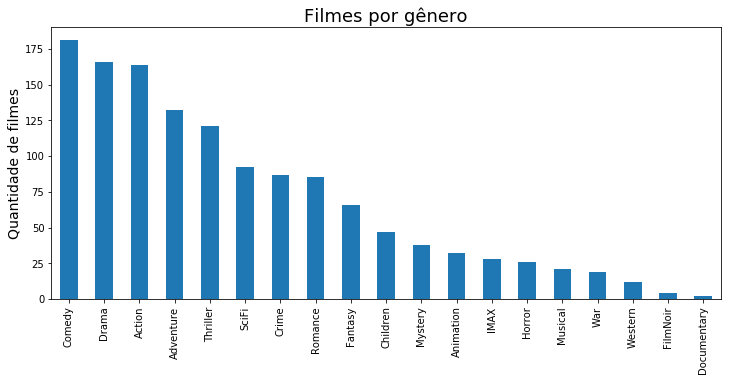

In [22]:
# solução
plt.figure(figsize=(12,5))
soma_dos_generos = generos.sum()
soma_dos_generos.sort_values(ascending=False, inplace=True)
soma_dos_generos.plot(kind='bar')
plt.title("Filmes por gênero", fontsize=18)
plt.ylabel("Quantidade de filmes", fontsize=14)
plt.show()

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes = soma_dos_generos[:5].index

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Index(['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller'], dtype='object')


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


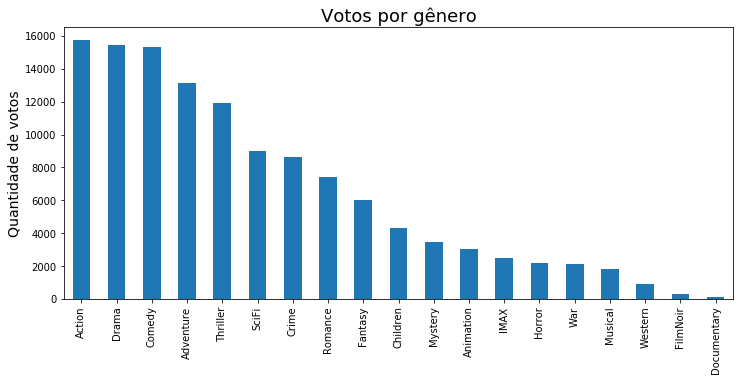

In [26]:
# solucão
plt.figure(figsize=(12,5))
soma_dos_votos = votos_por_genero_por_filme.sum()
soma_dos_votos.sort_values(ascending=False, inplace=True)
soma_dos_votos.plot(kind="bar")
plt.title("Votos por gênero", fontsize=18)
plt.ylabel("Quantidade de votos", fontsize=14)
plt.show()

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

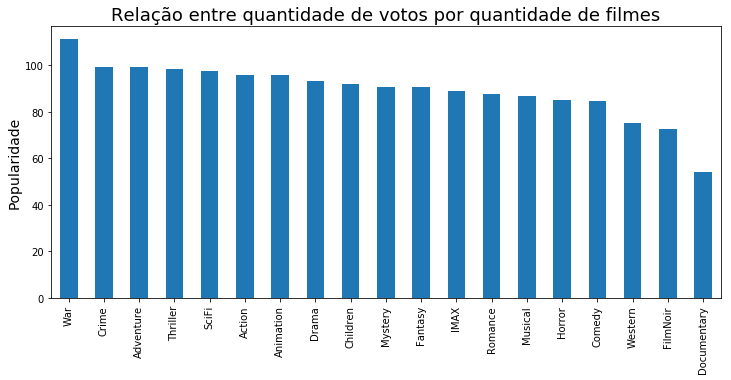

In [27]:
# solucao código
plt.figure(figsize=(12,5))
popularidade = soma_dos_votos / filmes.sum()[4:]
popularidade.sort_values(ascending=False,inplace=True)
popularidade.plot(kind='bar')
plt.title("Relação entre quantidade de votos por quantidade de filmes", fontsize=18)
plt.ylabel("Popularidade", fontsize=14)
plt.show()

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre): 

O gênero War, apesar de seus baixos números de votos e de filmes, ainda sim apresentou uma popularidade maior que todos os outros gêneros. Já o gênero Action, que apresentou o maior número de votos, caiu na lista de popularidade para sexto lugar, ficando abaixo de outros gêneros que tiveram inclusive mais votos.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

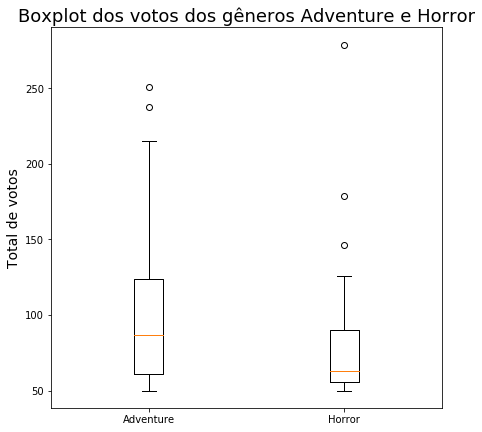

In [28]:
# solução:
plt.figure(figsize=(7,7))
votos_aventura = filmes.query('Adventure==1').total_de_votos
votos_horror = filmes.query('Horror==1').total_de_votos
plt.boxplot([votos_aventura, votos_horror], labels = ['Adventure', 'Horror'])
plt.title("Boxplot dos votos dos gêneros Adventure e Horror", fontsize=18)
plt.ylabel("Total de votos", fontsize=14)
plt.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

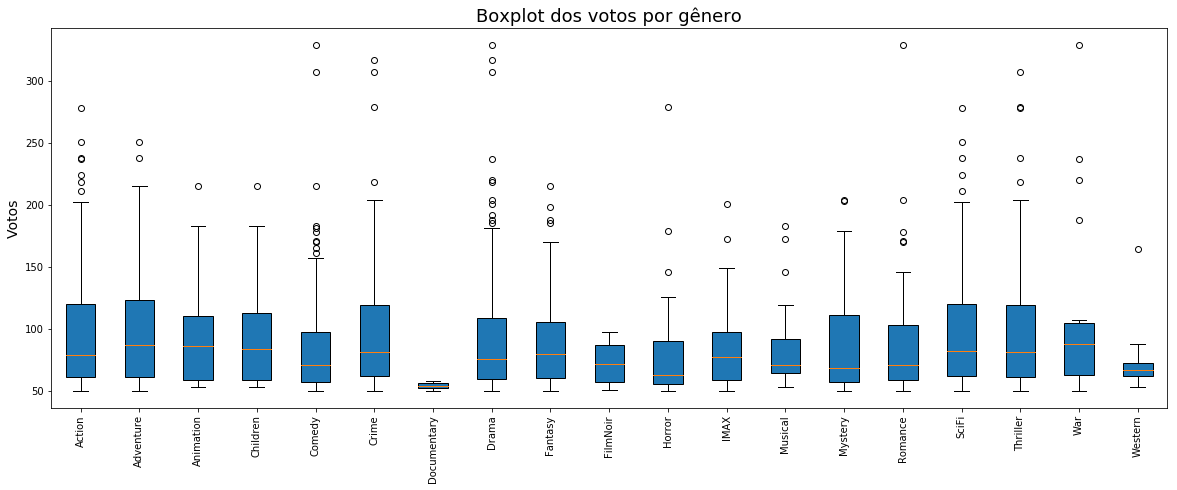

In [29]:
data = []
plt.figure(figsize=(20,7))
for genero in generos.columns:
    data.append(filmes.query(genero+'==1').total_de_votos)
plt.boxplot(data, labels=generos.columns, patch_artist=True)
plt.xticks(rotation=90)
plt.title('Boxplot dos votos por gênero', fontsize=18)
plt.ylabel('Votos', fontsize=14)
plt.show()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: 
Através de uma análise visual, o gênero Adventure seria a melhor escolha, pois apresenta a média e mediana maiores com relação ao número de votos.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

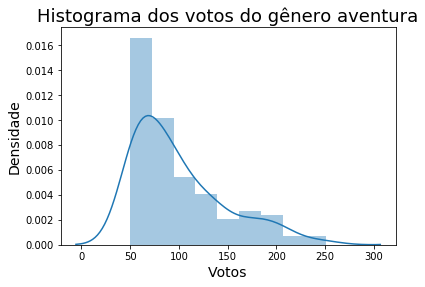

In [30]:
# solucao histograma de aventura
sns.distplot(votos_aventura)
plt.title('Histograma dos votos do gênero aventura', fontsize = 18)
plt.xlabel('Votos', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.show()

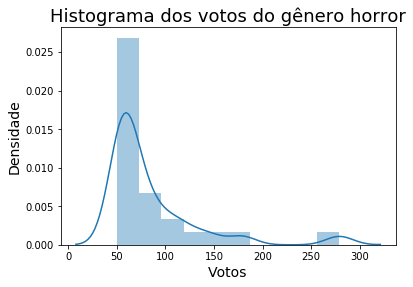

In [31]:
# solucao histograma de horror
sns.distplot(votos_horror)
plt.title('Histograma dos votos do gênero horror', fontsize = 18)
plt.xlabel('Votos', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.show()

In [32]:
# Solucao teste de normalidade ou justificativa para nao utiliza-lo:
alpha = 0.05
_, p_value_adventure = scipy.stats.normaltest(votos_aventura)
_, p_value_horror = scipy.stats.normaltest(votos_horror)
print("p-valor aventura: %.4f" %(p_value_adventure))
print("p-valor horror: %.4f" %(p_value_horror))
if p_value_adventure<alpha:
    print("Hipótese nula rejeitada para aventura. A distribuição não segue uma normal")
else:
    print("Hipótese nula aceita para aventura. A distribuição segue uma normal")
    
if p_value_horror<alpha:
    print("Hipótese nula rejeitada para horror. A distribuição não segue uma normal")
else:
    print("Hipótese nula aceita para horror. A distribuição segue uma normal")

p-valor aventura: 0.0000
p-valor horror: 0.0000
Hipótese nula rejeitada para aventura. A distribuição não segue uma normal
Hipótese nula rejeitada para horror. A distribuição não segue uma normal


In [33]:
# solução com o teste desejado
from statsmodels.stats.weightstats import DescrStatsW
descr_horror = DescrStatsW(votos_horror)
descr_aventura = DescrStatsW(votos_aventura)
comparacao = descr_aventura.get_compare(descr_horror)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,14.1789,10.230,1.386,0.168,-6.028,34.386


### Solução (explique sua conclusão):
Após a realização dos testes estatísticos, não foi possível encontrar uma diferença estatística entre os votos de ambos os gêneros.
Como resultado da análise, o p-valor encontrado foi de 0.168, maior do que a significância proposta (p = 0.05). Consideramos, então, que ambos os gêneros são estatisticamente iguais quanto ao número de votos.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

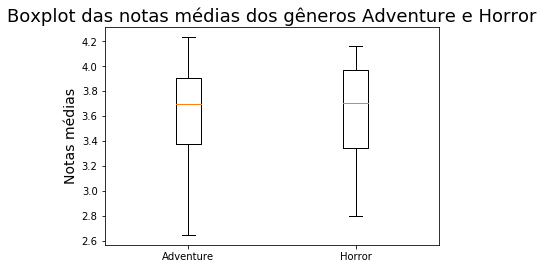

In [34]:
# solução:
notas_aventura = filmes.query('Adventure==1').nota_media
notas_horror = filmes.query('Horror==1').nota_media
plt.boxplot([notas_aventura, notas_horror], labels = ['Adventure', 'Horror'])
plt.title("Boxplot das notas médias dos gêneros Adventure e Horror", fontsize=18)
plt.ylabel("Notas médias", fontsize=14)
plt.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Visualmente é impossível afirmar qual seria a melhor opção. É válido considerar, portanto, que qualquer um dos gêneros é aceito, visto que as médias e medianas são bem próximas.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

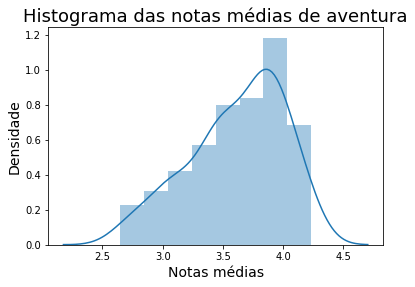

In [35]:
# solucao histograma de aventura
sns.distplot(notas_aventura)
plt.title('Histograma das notas médias de aventura', fontsize = 18)
plt.xlabel('Notas médias', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.show()

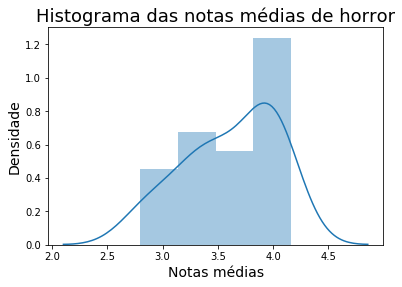

In [36]:
# solucao histograma de horror
sns.distplot(notas_horror)
plt.title('Histograma das notas médias de horror', fontsize = 18)
plt.xlabel('Notas médias', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.show()

In [37]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p_value_adventure = scipy.stats.normaltest(notas_aventura)
_, p_value_horror = scipy.stats.normaltest(notas_horror)
print("p-valor aventura: %.4f" %(p_value_adventure))
print("p-valor horror: %.4f" %(p_value_horror))
if p_value_adventure<alpha:
    print("Hipótese nula rejeitada para aventura. A distribuição não segue uma normal")
else:
    print("Hipótese nula aceita para aventura. A distribuição segue uma normal")
    
if p_value_horror<alpha:
    print("Hipótese nula rejeitada para horror. A distribuição não segue uma normal")
else:
    print("Hipótese nula aceita para horror. A distribuição segue uma normal")

p-valor aventura: 0.0128
p-valor horror: 0.2119
Hipótese nula rejeitada para aventura. A distribuição não segue uma normal
Hipótese nula aceita para horror. A distribuição segue uma normal


In [38]:
# solução com o teste desejado
descr_horror = DescrStatsW(notas_horror)
descr_aventura = DescrStatsW(notas_aventura)
comparacao = descr_aventura.get_compare(descr_horror)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.057,0.955,-0.163,0.173


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: 
Após a realização dos testes estatísticos, não foi possível encontrar uma diferença estatística entre as notas médias de ambos os gêneros.
Como resultado da análise, o p-valor encontrado foi de 0.955, maior do que a significância proposta (p = 0.05). Consideramos, então, que ambos os gêneros são estatisticamente iguais quanto às notas médias.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: 

1° lugar: Adventure.
2° lugar: Horror.



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [39]:
votos_por_genero = soma_dos_votos[:2]

In [40]:
# solução: calculando os 2 generos mais votados
print("Os 2 gêneros mais votados são %s e %s" %(votos_por_genero.index[0],votos_por_genero.index[1]))

Os 2 gêneros mais votados são Action e Drama


In [41]:
# solução: encontrando os top 5 filmes desses generos
top_5_action = filmes.query("Action==1").sort_values('nota_media', ascending=False).titulo[:5].values
print("Os 5 top filmes do gênero action são:")
for index, filme in enumerate(top_5_action):
    print(index + 1, "- "+ filme)
    
print("------------------")

top_5_drama = filmes.query("Drama==1").sort_values('nota_media', ascending=False).titulo[:5].values
print("Os 5 top filmes do gênero drama são:")
for index, filme in enumerate(top_5_drama):
    print(index + 1, "- "+ filme)

Os 5 top filmes do gênero action são:
1 - Fight Club (1999)
2 - Dark Knight, The (2008)
3 - Princess Bride, The (1987)
4 - Star Wars: Episode IV - A New Hope (1977)
5 - Apocalypse Now (1979)
------------------
Os 5 top filmes do gênero drama são:
1 - Shawshank Redemption, The (1994)
2 - Godfather, The (1972)
3 - Fight Club (1999)
4 - Cool Hand Luke (1967)
5 - Godfather: Part II, The (1974)


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [42]:
# solucao
genero_maior_corr_com_media = filmes.drop(['titulo','ano_de_lancamento','total_de_votos'], axis=1).corr().nota_media.sort_values(ascending=False)
print("Os gêneros com maior correlação com a nota média são: %s e %s" %(genero_maior_corr_com_media.index[1], genero_maior_corr_com_media.index[2]))
print("Os gêneros com menor correlação com a nota média são: %s e %s" %(genero_maior_corr_com_media.index[-1], genero_maior_corr_com_media.index[-2]))

Os gêneros com maior correlação com a nota média são: Drama e Crime
Os gêneros com menor correlação com a nota média são: Comedy e Action


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [43]:
# solucao
genero_maior_corr_com_total_de_votos = filmes.drop(['titulo','ano_de_lancamento','nota_media'], axis=1).corr().total_de_votos.sort_values(ascending=False)
print("Os gêneros com maior correlação com o total de votos são: %s e %s" %(genero_maior_corr_com_total_de_votos.index[1], genero_maior_corr_com_media.index[2]))
print("Os gêneros com menor correlação com o total de votos são: %s e %s" %(genero_maior_corr_com_total_de_votos.index[-1], genero_maior_corr_com_media.index[-2]))

Os gêneros com maior correlação com o total de votos são: Adventure e Crime
Os gêneros com menor correlação com o total de votos são: Comedy e Action


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

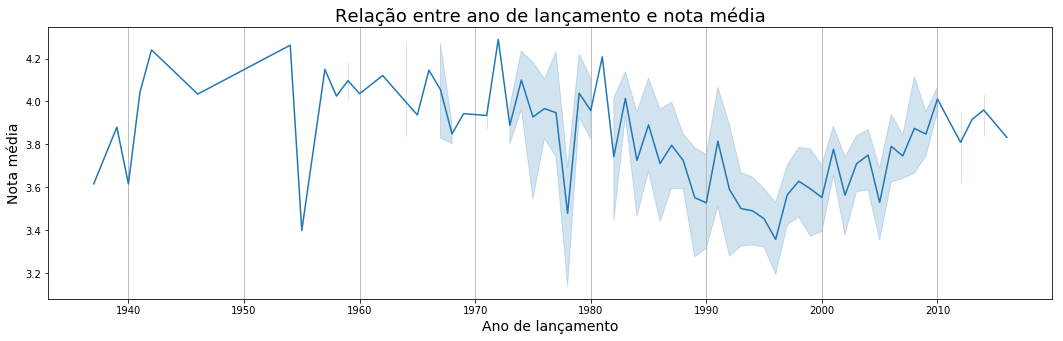

In [44]:
# solucao
plt.figure(figsize=(18,5))
sns.lineplot(x = 'ano_de_lancamento', y = 'nota_media', data=filmes)
plt.title('Relação entre ano de lançamento e nota média', fontsize = 18)
plt.ylabel('Nota média', fontsize=14)
plt.xlabel('Ano de lançamento', fontsize=14)
plt.grid(which='major', axis='x')
plt.show()

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [45]:
# solução (código)
filmes.corr().ano_de_lancamento.nota_media

-0.1591455520444448

### Solução (explicação)

As variáveis analisadas (nota média e ano de lançamento) são independentes. Portanto, analisar só a correlação para verificar o efeito de causalidade não faz sentido.
Apenas analisando a correlação podemos inferir que quando uma das variáveis aumenta, a outra diminui, e vice-versa.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

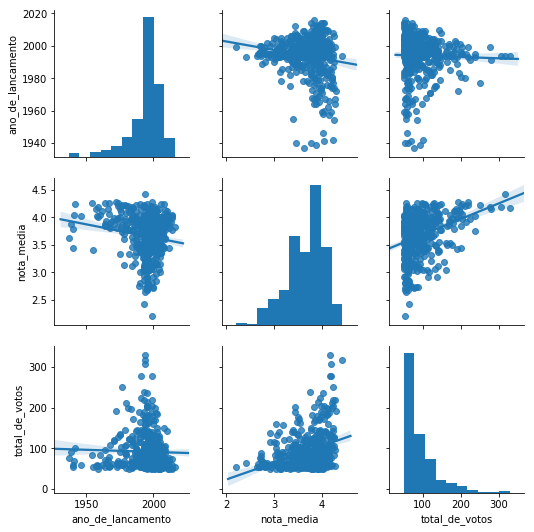

In [46]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
sns.pairplot(infos, kind='reg')
plt.show()

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

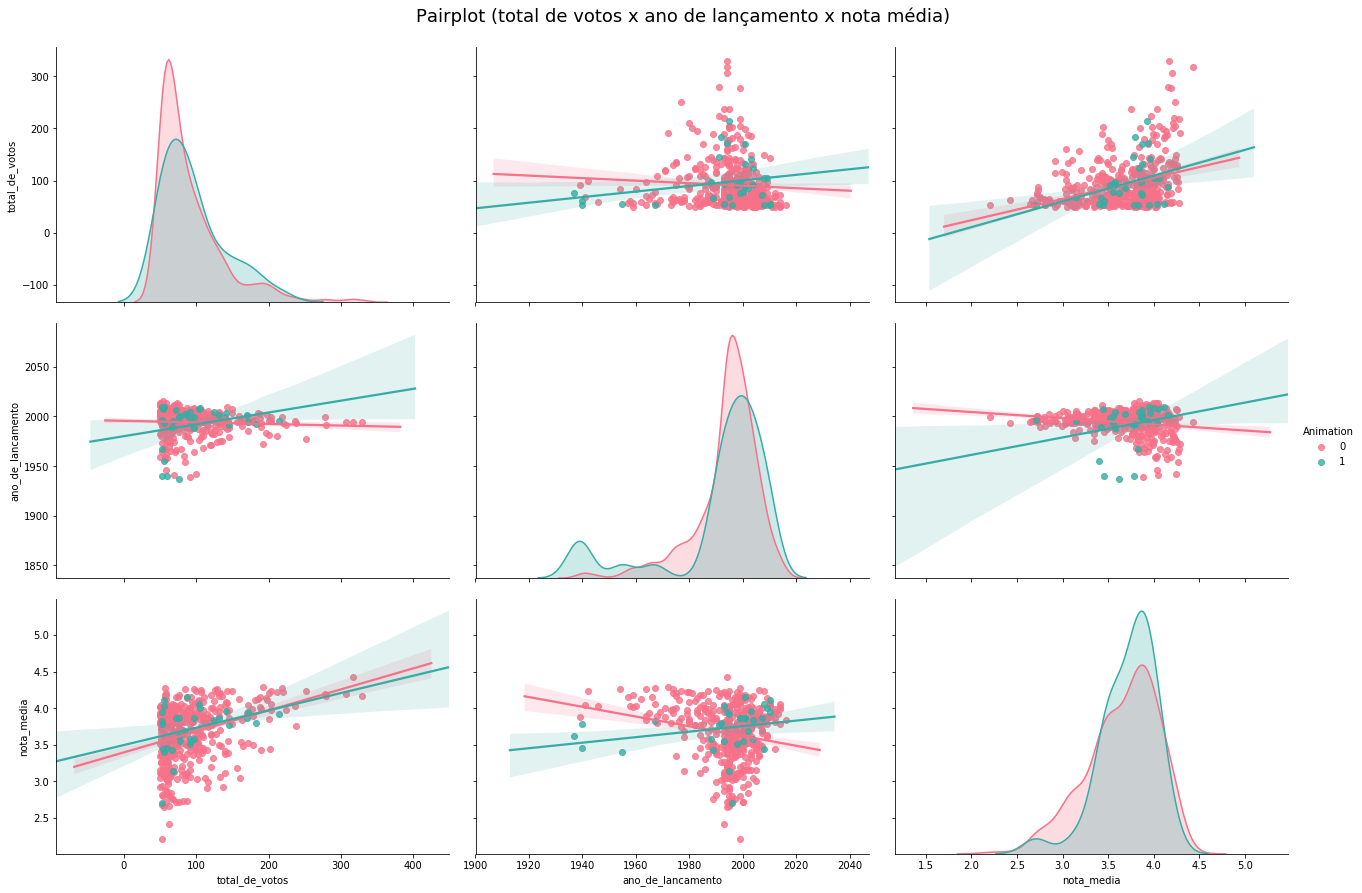

In [58]:
ax = sns.pairplot(filmes, hue = 'Animation', 
             x_vars=['total_de_votos','ano_de_lancamento','nota_media'], 
             y_vars=['total_de_votos','ano_de_lancamento','nota_media'], 
             palette='husl',
             height = 4,
             aspect = 1.5,
             kind='reg')
ax.fig.suptitle('Pairplot (total de votos x ano de lançamento x nota média)', fontsize = 18, y=1.03)
plt.show()

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

Observamos que a nota média do gênero Animation tende a subir levemente com o passar dos anos, de acordo com a reta de regressão. Os filmes com ano de lançamento mais antigos apresentam médias um pouco menores do que os mais atuais. A correlação entre elas aparenta ser muito pequena. 

Quando observamos ano de lançamento e total de votos também há uma correlação muito fraca, e uma tendêndia positiva, se observamos a reta de regressão.

Os filmes de Animation tendem a subir na classificação do ranking de total de votos e também na classificação do ranking de notas. Os filmes serão mais votados e com notas melhores!

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [48]:
# solução

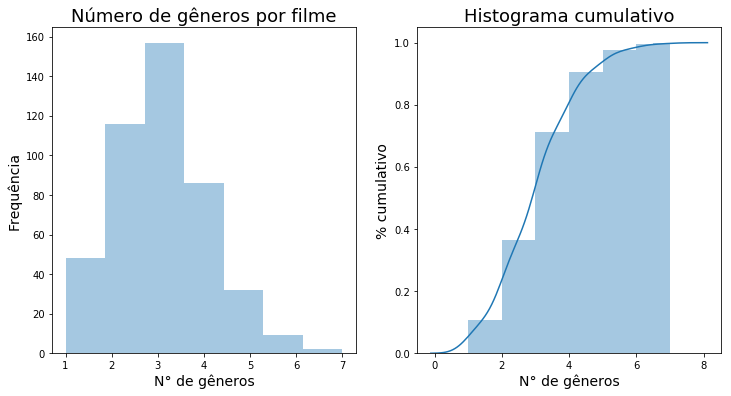

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(filmes.T[4:].sum().sort_values(ascending=False), kde=False, bins=7, ax=ax[0])
sns.distplot(filmes.T[4:].sum().sort_values(ascending=False), hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True}, ax=ax[1])
ax[0].set_title('Número de gêneros por filme', fontsize=18)
ax[0].set_ylabel('Frequência', fontsize=14)
ax[0].set_xlabel('N° de gêneros', fontsize=14)

ax[1].set_title('Histograma cumulativo', fontsize=18)
ax[1].set_ylabel('% cumulativo', fontsize=14)
ax[1].set_xlabel('N° de gêneros', fontsize=14)

plt.show()

### Conclusão: 

A maioria dos filmes contém 3 gêneros em sua classificação.

In [72]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Conclusão: 

Temos 610 usuários distintos que votaram nos filmes, 193.609 filmes no total, com um total de 100.836 votos (o mínimo de votos para um único usuário é de 20 votos). A nota mínima no dataset é de 0.5 e a máxima 5.0.